In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from scipy.ndimage.filters import gaussian_filter
tqdm.pandas()
import cmocean

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\tqdm\std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

In [3]:
PATH_RAW = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'
#PATH_64PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_fulltile/'
PATH_64PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_rejigged_fulltile/'
PATH_32PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_32px_fulltile/'

In [4]:
hdus = [fits.open(f'{PATH_RAW}{folder}/{folder[:4]}_cdens.fits')[0] for folder in tqdm(os.listdir(PATH_RAW))]

100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [00:06<00:00, 25.25it/s]


(720, 720)


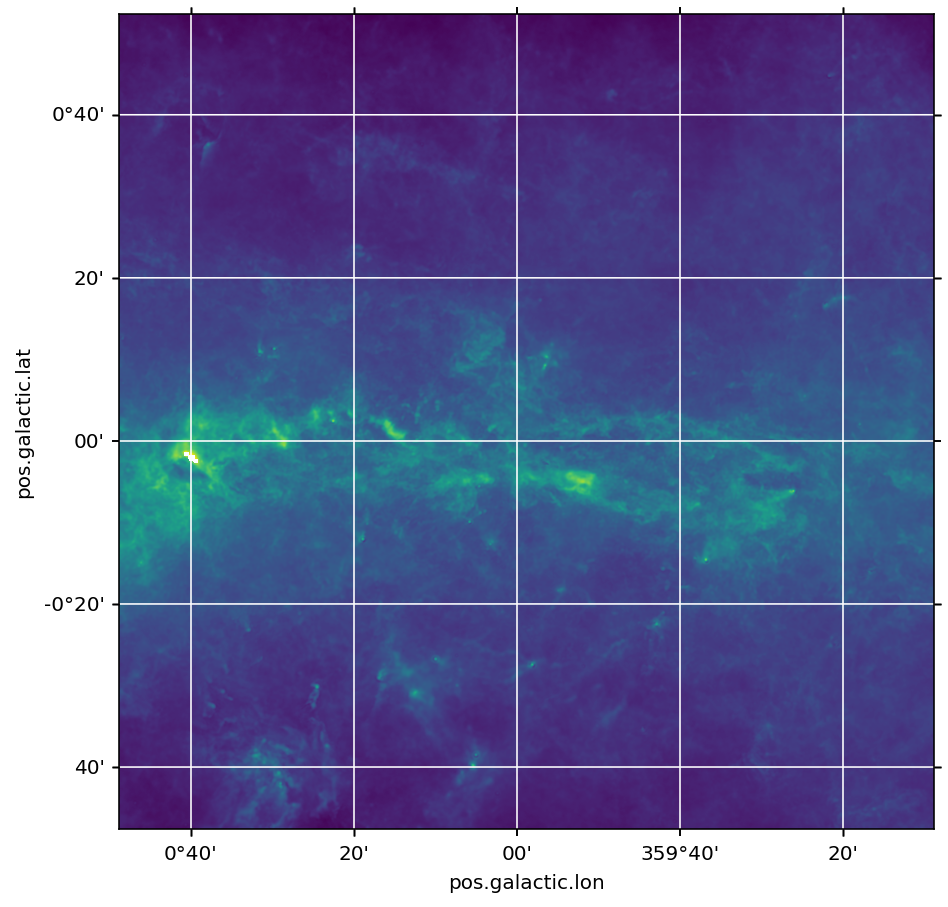

In [5]:
plt.figure(figsize=(1080/144, 1080/144), dpi=144)

hdu_1 = hdus[0]
wcs = WCS(hdu_1.header)
image_array = hdu_1.data
img_size_px = np.shape(image_array)
position_x = int(img_size_px[0]//2)
position_y = int(img_size_px[0]//2)
position = (position_x,position_y)
print(position)
size = 1000
size = (size,size)
cutout_1 = Cutout2D(image_array,position=position,size=size,wcs=wcs)
img = np.asarray(cutout_1.data)
plt.subplot(projection=cutout_1.wcs)
plt.imshow(np.log10(img), origin='lower')
plt.grid(color='white', ls='solid')

hdu_2 = hdus[1]
wcs = WCS(hdu_2.header)
image_array = hdu_2.data
img_size_px = np.shape(image_array)
position_x = int(img_size_px[0]//2)
position_y = int(img_size_px[0]//2)
position = (position_x,position_y)
size = 1000
size = (size,size)
cutout_2 = Cutout2D(image_array,position=position,size=size,wcs=wcs)
img = np.asarray(cutout_2.data)

hdu_3 = hdus[2]
wcs = WCS(hdu_3.header)
image_array = hdu_3.data
img_size_px = np.shape(image_array)
position_x = int(img_size_px[0]//2)
position_y = int(img_size_px[0]//2)
position = (position_x,position_y)
size = 1000
size = (size,size)
cutout_3 = Cutout2D(image_array,position=position,size=size,wcs=wcs)
img = np.asarray(cutout_3.data)

plt.show()

In [6]:
hdu_toward = [hdus[0],hdus[1],hdus[-1]]
wcs_toward, shape_toward = find_optimal_celestial_wcs(hdu_toward,projection='CAR')
array_toward, footprint_toward = reproject_and_coadd(hdu_toward,
                                       wcs_toward, shape_out=shape_toward,
                                       reproject_function=reproject_interp)

hdu_away = [hdus[80],hdus[81],hdus[82]]
wcs_away, shape_away = find_optimal_celestial_wcs(hdu_away,projection='CAR')
array_away, footprint_away = reproject_and_coadd(hdu_away,
                                       wcs_away, shape_out=shape_away,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.90s/it]


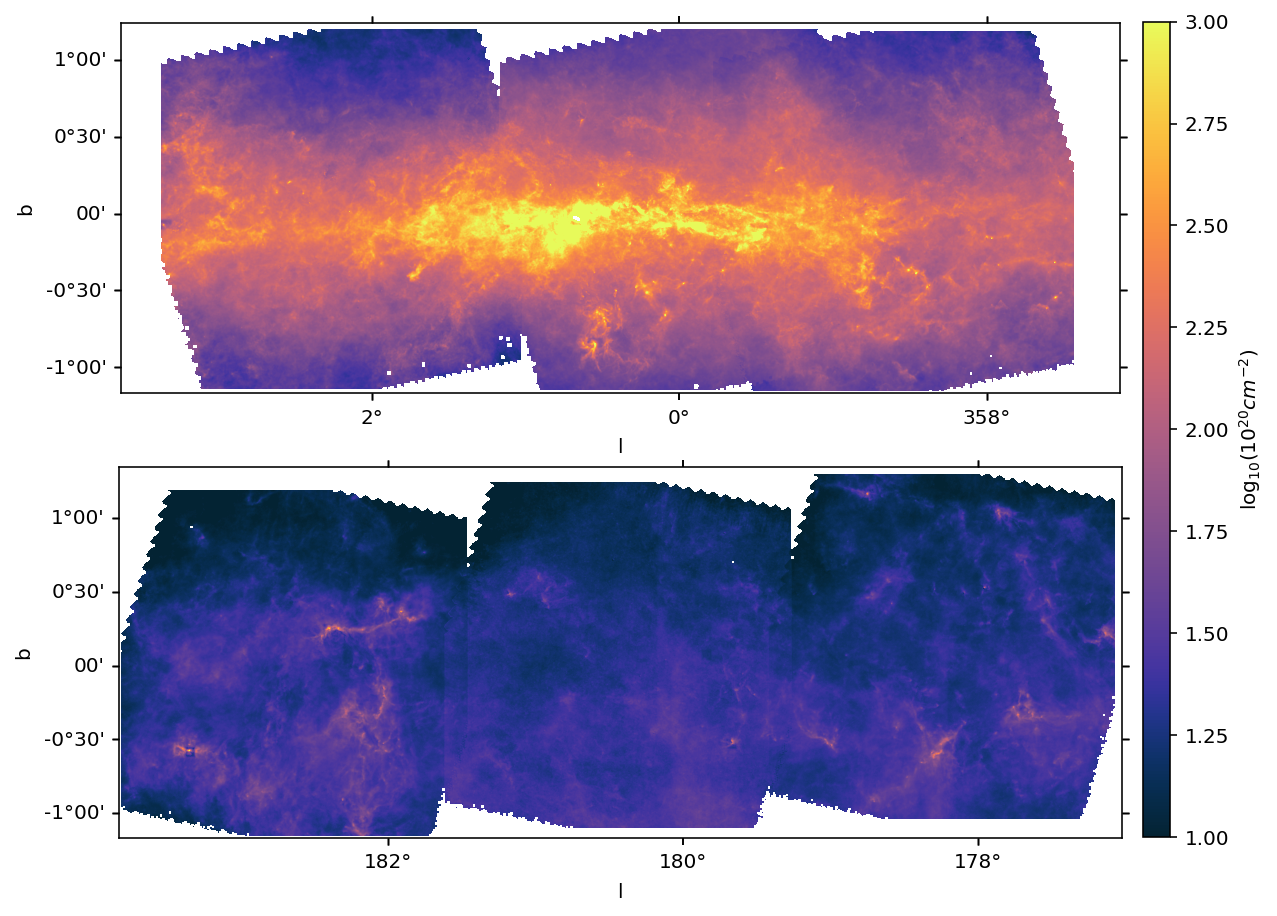

In [7]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144), dpi=144)#figsize=(10*2, 8*2))

ax1 = plt.subplot(2,1, 1, projection=wcs_toward)
plt.imshow(np.log10(array_toward), origin='lower',cmap=cmocean.cm.thermal,vmin=1, vmax=3)
ax1.set_xlabel('l')
ax1.set_ylabel('b')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.subplot(2,1, 2, projection=wcs_away)
plt.imshow(np.log10(array_away), origin='lower', cmap=cmocean.cm.thermal,vmin=1,vmax = 3)
plt.xlabel('l')
plt.ylabel('b')

cax = plt.axes([0.9, 0.126, 0.02, 0.755])
plt.colorbar(cax=cax, label=r'$\log_{10}(10^{20} cm^{-2})$')

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/Raw_ColumnDensity_toward_away.png', bbox_inches="tight")

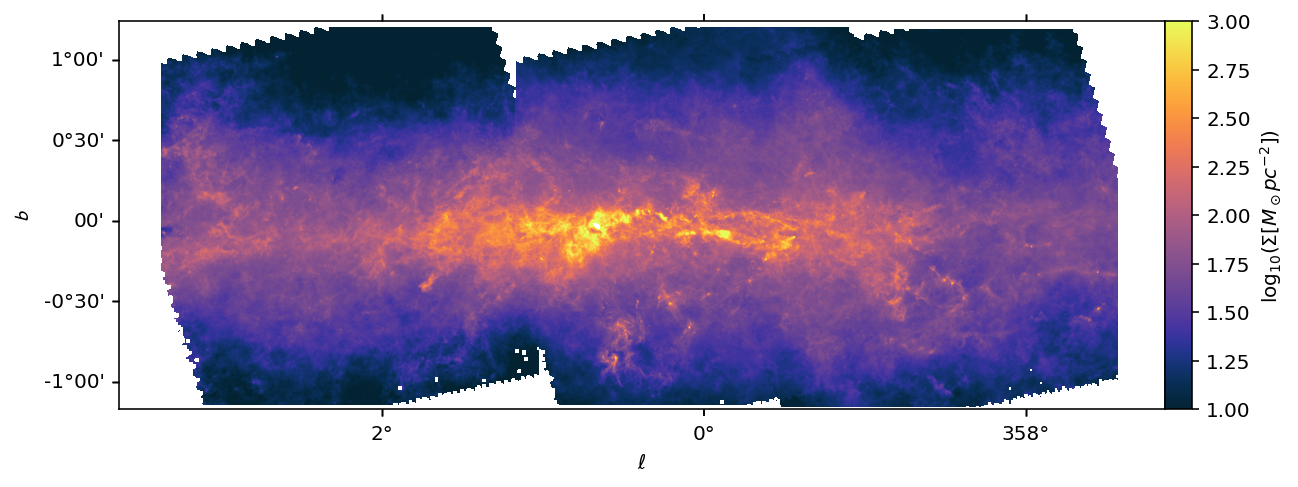

In [14]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)#figsize=(10*2, 8*2))

ax1 = plt.subplot(1,1, 1, projection=wcs_toward)
plt.imshow(np.log10(array_toward/2.72), origin='lower',cmap=cmocean.cm.thermal,vmin=1, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\mathcal{b}$')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cax = plt.axes([0.9, 0.143, 0.02, 0.718])
plt.colorbar(cax=cax, label=r'$\log_{10}(\Sigma [M_\odot pc^{-2}])$')

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/Raw_ColumnDensity_toward.png', bbox_inches="tight")

In [46]:
H1 = np.loadtxt(PATH_64PX+'H/avg_data/000.txt')
H1[H1==0] = np.nan
H1[H1>1] = 1

H2 = np.loadtxt(PATH_64PX+'H/avg_data/002.txt')
H2[H2==0] = np.nan
H2[H2>1] = 1

H0 = np.loadtxt(PATH_64PX+'H/avg_data/358.txt')
H0[H0==0] = np.nan
H0[H0>1] = 1



H178 = np.loadtxt(PATH_64PX+'H/avg_data/178.txt')
H178[H178==0] = np.nan
H178[H178>1] = 1

H180 = np.loadtxt(PATH_64PX+'H/avg_data/180.txt')
H180[H180==0] = np.nan
H180[H180>1] = 1

H182 = np.loadtxt(PATH_64PX+'H/avg_data/182.txt')
H182[H182==0] = np.nan
H182[H182>1] = 1



H_0 = hdus[-1].copy()
H_0.data = H0
H_1 = hdus[0].copy()
H_1.data = H1
H_2 = hdus[1].copy()
H_2.data = H2

H_178 = hdus[80].copy()
H_178.data = H178
H_180 = hdus[81].copy()
H_180.data = H180
H_182 = hdus[82].copy()
H_182.data = H182

In [47]:
hdu_toward_H = [H_0,H_1,H_2]
wcs_toward_H, shape_toward_H = find_optimal_celestial_wcs(hdu_toward_H,projection='CAR')
array_toward_H, footprint_toward_H = reproject_and_coadd(hdu_toward_H,
                                       wcs_toward_H, shape_out=shape_toward_H,
                                       reproject_function=reproject_interp)

hdu_away_H = [H_178,H_180,H_182]
wcs_away_H, shape_away_H = find_optimal_celestial_wcs(hdu_away_H,projection='CAR')
array_away_H, footprint_away_H = reproject_and_coadd(hdu_away_H,
                                       wcs_away_H, shape_out=shape_away_H,
                                       reproject_function=reproject_interp)


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.41s/it]


C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


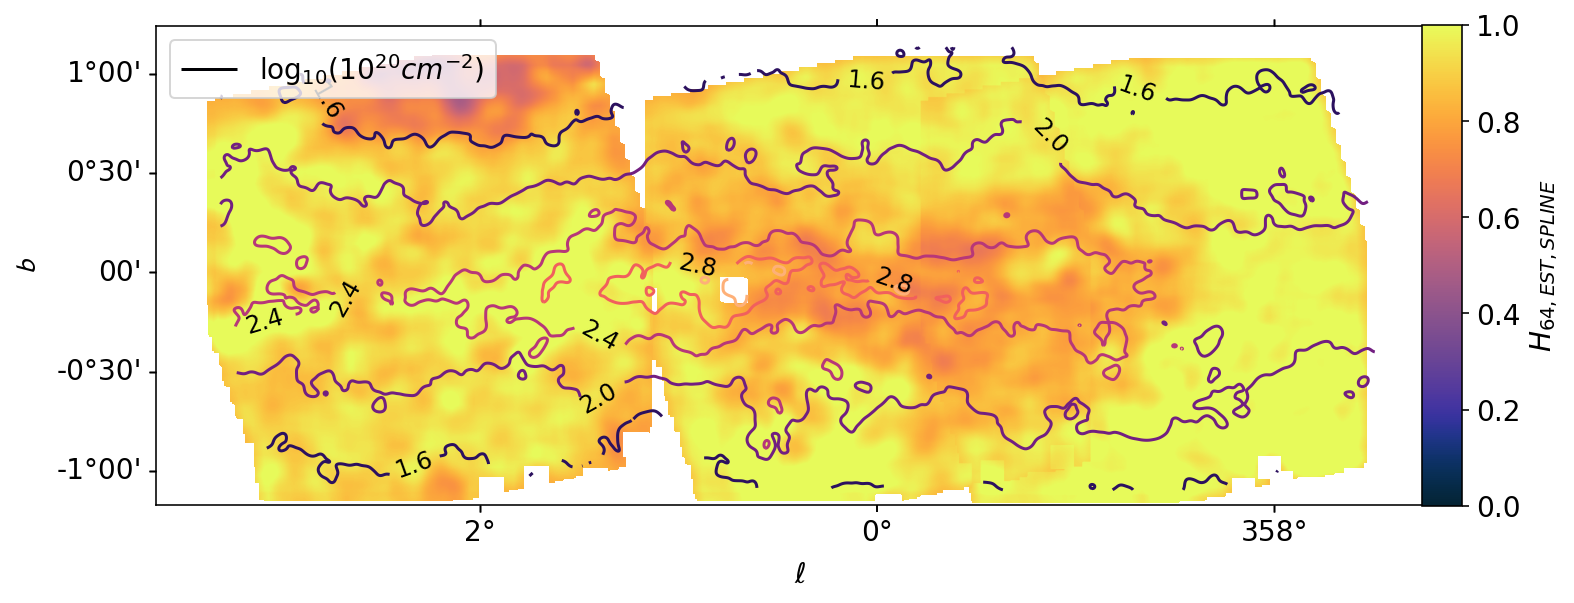

In [77]:
sigma = 10
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)

ax1 = plt.subplot(1,1, 1, projection=wcs_toward_H)
plt.imshow(array_toward_H, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\cal b$')
cont = ax1.contour(gaussian_filter(np.log10(array_toward),sigma), levels = 5, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

cax = plt.axes([0.96, 0.055, 0.03, 0.890])
plt.colorbar(im, cax=cax, label=r'$H_{64,EST,SPLINE}$')

h = [cont.collections[0]]
l = [r'$\log_{10}(10^{20} cm^{-2})$' for a in cont.levels]
ax1.legend(h,l, loc='upper left')

plt.tight_layout()
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/H_64px_maps_toward.png', bbox_inches="tight")

In [78]:
S1 = np.loadtxt(PATH_64PX+'S/avg_data/000.txt')
S1[S1==0] = np.nan
S1[S1<0] = 0

S2 = np.loadtxt(PATH_64PX+'S/avg_data/002.txt')
S2[S2==0] = np.nan
S2[S2<0]=0

S0 = np.loadtxt(PATH_64PX+'S/avg_data/358.txt')
S0[S0==0] = np.nan
S0[S0<0]=0



S178 = np.loadtxt(PATH_64PX+'S/avg_data/178.txt')
S178[S178==0] = np.nan
S178[S178<0]=0

S180 = np.loadtxt(PATH_64PX+'S/avg_data/180.txt')
S180[S180==0] = np.nan
S180[S180<0]=0

S182 = np.loadtxt(PATH_64PX+'S/avg_data/182.txt')
S182[S182==0] = np.nan
S182[S182<0]=0



S_0 = hdus[-1].copy()
S_0.data = S0
S_1 = hdus[0].copy()
S_1.data = S1
S_2 = hdus[1].copy()
S_2.data = S2

S_178 = hdus[80].copy()
S_178.data = S178
S_180 = hdus[81].copy()
S_180.data = S180
S_182 = hdus[82].copy()
S_182.data = S182

hdu_toward_S = [S_0,S_1,S_2]
wcs_toward_S, shape_toward_S = find_optimal_celestial_wcs(hdu_toward_S,projection='CAR')
array_toward_S, footprint_toward_S = reproject_and_coadd(hdu_toward_S,
                                       wcs_toward_S, shape_out=shape_toward_S,
                                       reproject_function=reproject_interp)

hdu_away_S = [S_178,S_180,S_182]
wcs_away_S, shape_away_S = find_optimal_celestial_wcs(hdu_away_S,projection='CAR')
array_away_S, footprint_away_S = reproject_and_coadd(hdu_away_S,
                                       wcs_away_S, shape_out=shape_away_S,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.51s/it]


C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


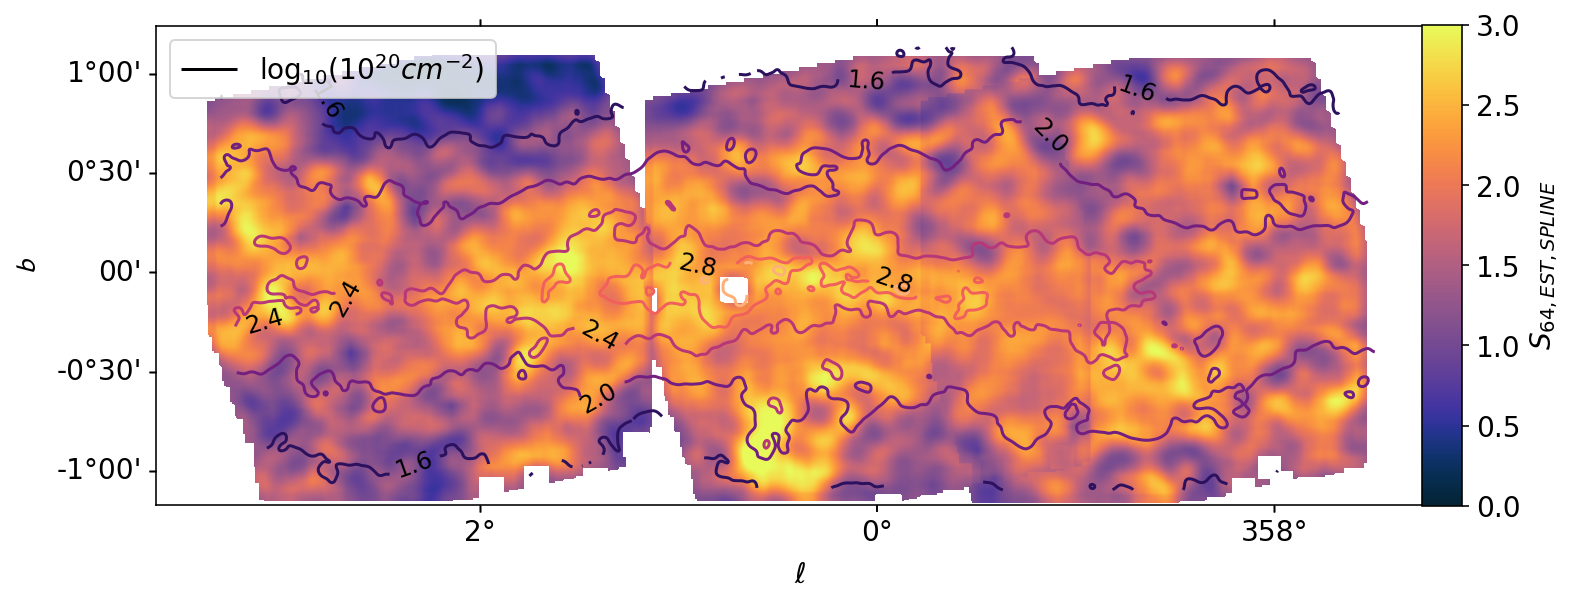

In [85]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)
plt.rcParams.update({'font.size': 14})

ax1 = plt.subplot(1,1, 1, projection=wcs_toward_S)
plt.imshow(array_toward_S, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\cal b$')
cont = ax1.contour(gaussian_filter(np.log10(array_toward),sigma), levels = 5, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

cax = plt.axes([0.96, 0.055, 0.03, 0.890])
plt.colorbar(im, cax=cax, label=r'$S_{64,EST,SPLINE}$')

h = [cont.collections[0]]
l = [r'$\log_{10}(10^{20} cm^{-2})$' for a in cont.levels]
ax1.legend(h,l, loc='upper left')

plt.tight_layout()
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/S_64px_maps_toward.png', bbox_inches="tight")

In [86]:
H1 = np.loadtxt(PATH_32PX+'H/avg_data/000.txt')
H1[H1==0] = np.nan
H1[H1>1] = 1

H2 = np.loadtxt(PATH_32PX+'H/avg_data/002.txt')
H2[H2==0] = np.nan
H2[H2>1] = 1

H0 = np.loadtxt(PATH_32PX+'H/avg_data/358.txt')
H0[H0==0] = np.nan
H0[H0>1] = 1



H178 = np.loadtxt(PATH_32PX+'H/avg_data/178.txt')
H178[H178==0] = np.nan
H178[H178>1] = 1

H180 = np.loadtxt(PATH_32PX+'H/avg_data/180.txt')
H180[H180==0] = np.nan
H180[H180>1] = 1

H182 = np.loadtxt(PATH_32PX+'H/avg_data/182.txt')
H182[H182==0] = np.nan
H182[H182>1] = 1



H_0 = hdus[-1].copy()
H_0.data = H0
H_1 = hdus[0].copy()
H_1.data = H1
H_2 = hdus[1].copy()
H_2.data = H2

H_178 = hdus[80].copy()
H_178.data = H178
H_180 = hdus[81].copy()
H_180.data = H180
H_182 = hdus[82].copy()
H_182.data = H182

hdu_toward_H = [H_0,H_1,H_2]
wcs_toward_H, shape_toward_H = find_optimal_celestial_wcs(hdu_toward_H,projection='CAR')
array_toward_H, footprint_toward_H = reproject_and_coadd(hdu_toward_H,
                                       wcs_toward_H, shape_out=shape_toward_H,
                                       reproject_function=reproject_interp)

hdu_away_H = [H_178,H_180,H_182]
wcs_away_H, shape_away_H = find_optimal_celestial_wcs(hdu_away_H,projection='CAR')
array_away_H, footprint_away_H = reproject_and_coadd(hdu_away_H,
                                       wcs_away_H, shape_out=shape_away_H,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.59s/it]


C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


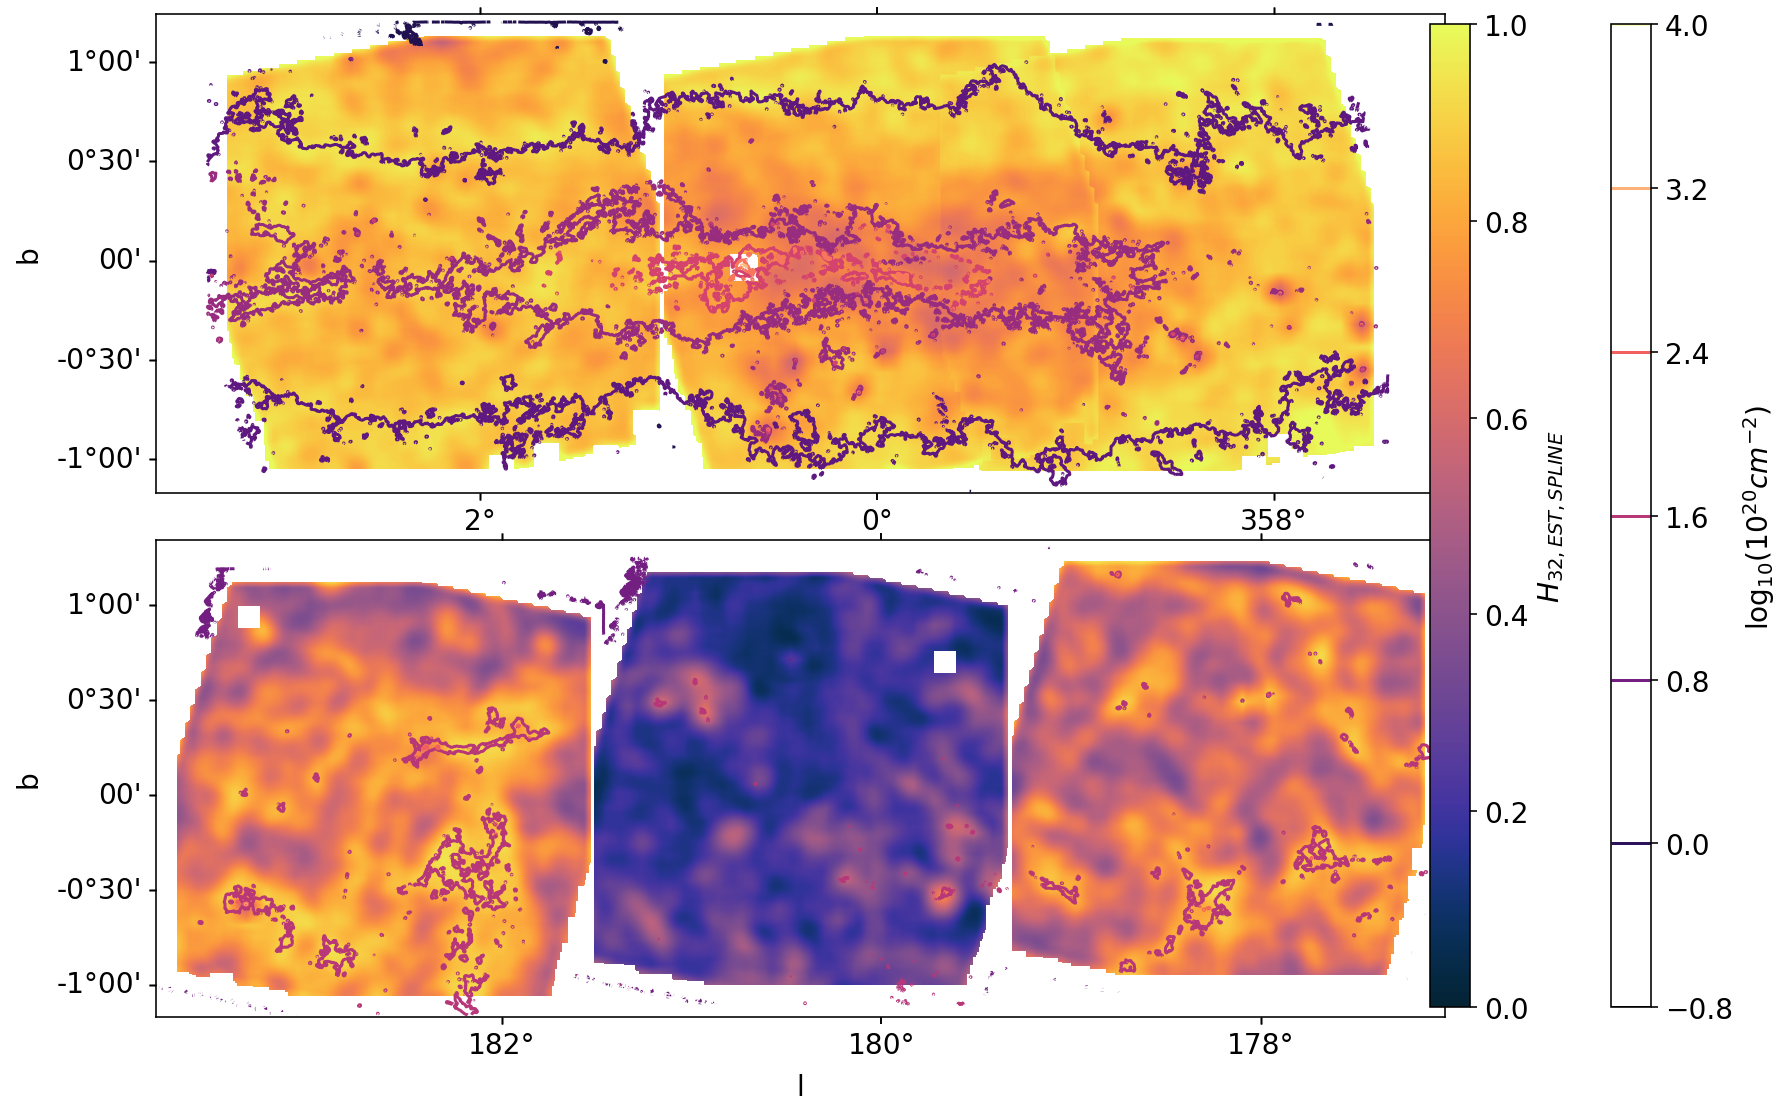

In [87]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144), dpi=144)
plt.rcParams.update({'font.size': 14})

ax1 = plt.subplot(2,1, 1, projection=wcs_toward_S)
plt.imshow(array_toward_H, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel('b')
ax1.contour(np.log10(array_toward), levels = 5, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.subplot(2,1, 2, projection=wcs_away_S)
im = plt.imshow(array_away_H, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
plt.xlabel('l')
plt.ylabel('b')
cont = plt.contour(np.log10(array_away), levels = 5, cmap = 'magma')
ccax = plt.axes([1.1, 0.045, 0.03, 0.910])
plt.colorbar(cont, cax=ccax, label=r'$\log_{10}(10^{20} cm^{-2})$')


cax = plt.axes([0.966, 0.045, 0.03, 0.910])
plt.colorbar(im, cax=cax, label=r'$H_{32,EST,SPLINE}$')
plt.tight_layout()
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/H_32px_maps.png', bbox_inches="tight")

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


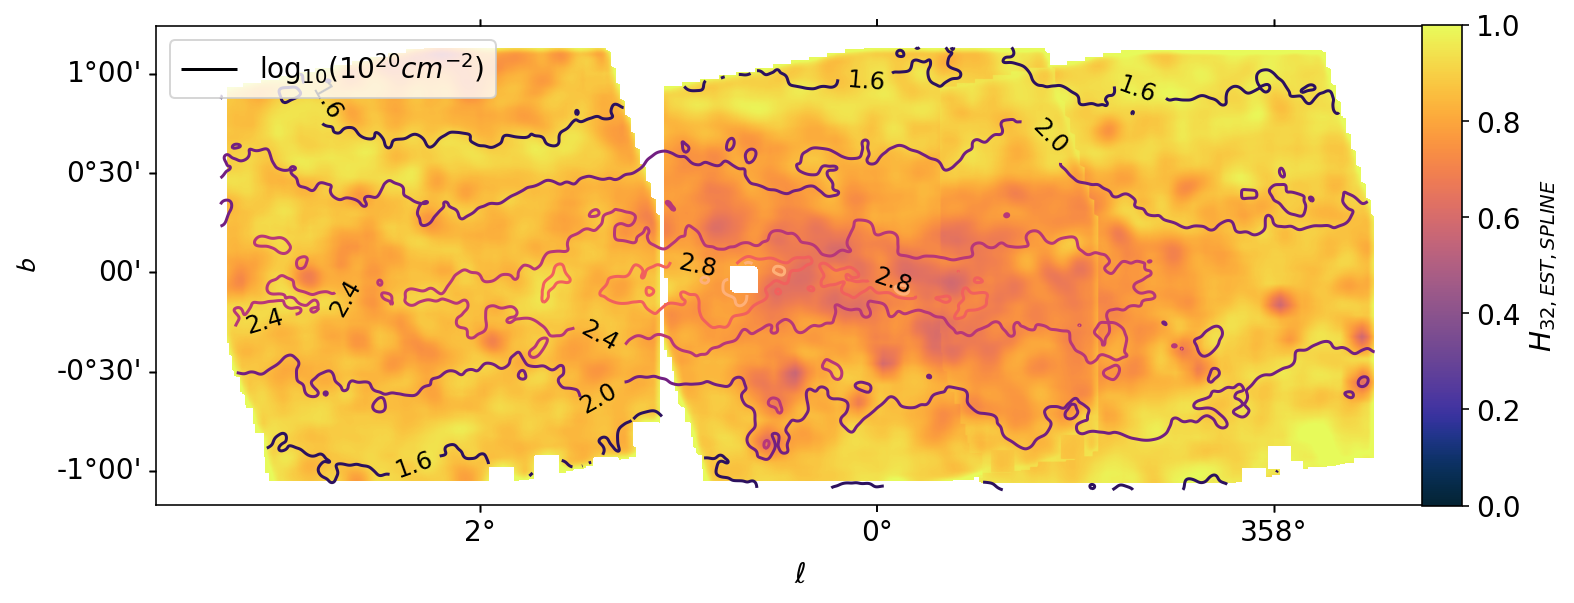

In [91]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)
plt.rcParams.update({'font.size': 14})

ax1 = plt.subplot(1,1, 1, projection=wcs_toward_H)
plt.imshow(array_toward_H, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=1)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\cal b$')
cont=ax1.contour(gaussian_filter(np.log10(array_toward),sigma), levels = 5, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.clabel(cont, fmt='%1.1f', colors = 'k', fontsize=12)

cax = plt.axes([0.96, 0.055, 0.03, 0.890])
plt.colorbar(im, cax=cax, label=r'$H_{32,EST,SPLINE}$')

h = [cont.collections[0]]
l = [r'$\log_{10}(10^{20} cm^{-2})$' for a in cont.levels]
ax1.legend(h,l, loc='upper left')

plt.tight_layout()
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/H_32px_maps_toward.png', bbox_inches="tight")

In [19]:
S1 = np.loadtxt(PATH_32PX+'S/avg_data/000.txt')
S1[S1==0] = np.nan
S1[S1<0] = 0

S2 = np.loadtxt(PATH_32PX+'S/avg_data/002.txt')
S2[S2==0] = np.nan
S2[S2<0]=0

S0 = np.loadtxt(PATH_32PX+'S/avg_data/358.txt')
S0[S0==0] = np.nan
S0[S0<0]=0



S178 = np.loadtxt(PATH_32PX+'S/avg_data/178.txt')
S178[S178==0] = np.nan
S178[S178<0]=0

S180 = np.loadtxt(PATH_32PX+'S/avg_data/180.txt')
S180[S180==0] = np.nan
S180[S180<0]=0

S182 = np.loadtxt(PATH_32PX+'S/avg_data/182.txt')
S182[S182==0] = np.nan
S182[S182<0]=0



S_0 = hdus[-1].copy()
S_0.data = S0
S_1 = hdus[0].copy()
S_1.data = S1
S_2 = hdus[1].copy()
S_2.data = S2

S_178 = hdus[80].copy()
S_178.data = S178
S_180 = hdus[81].copy()
S_180.data = S180
S_182 = hdus[82].copy()
S_182.data = S182

hdu_toward_S = [S_0,S_1,S_2]
wcs_toward_S, shape_toward_S = find_optimal_celestial_wcs(hdu_toward_S,projection='CAR')
array_toward_S, footprint_toward_S = reproject_and_coadd(hdu_toward_S,
                                       wcs_toward_S, shape_out=shape_toward_S,
                                       reproject_function=reproject_interp)

hdu_away_S = [S_178,S_180,S_182]
wcs_away_S, shape_away_S = find_optimal_celestial_wcs(hdu_away_S,projection='CAR')
array_away_S, footprint_away_S = reproject_and_coadd(hdu_away_S,
                                       wcs_away_S, shape_out=shape_away_S,
                                       reproject_function=reproject_interp)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.49s/it]


C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


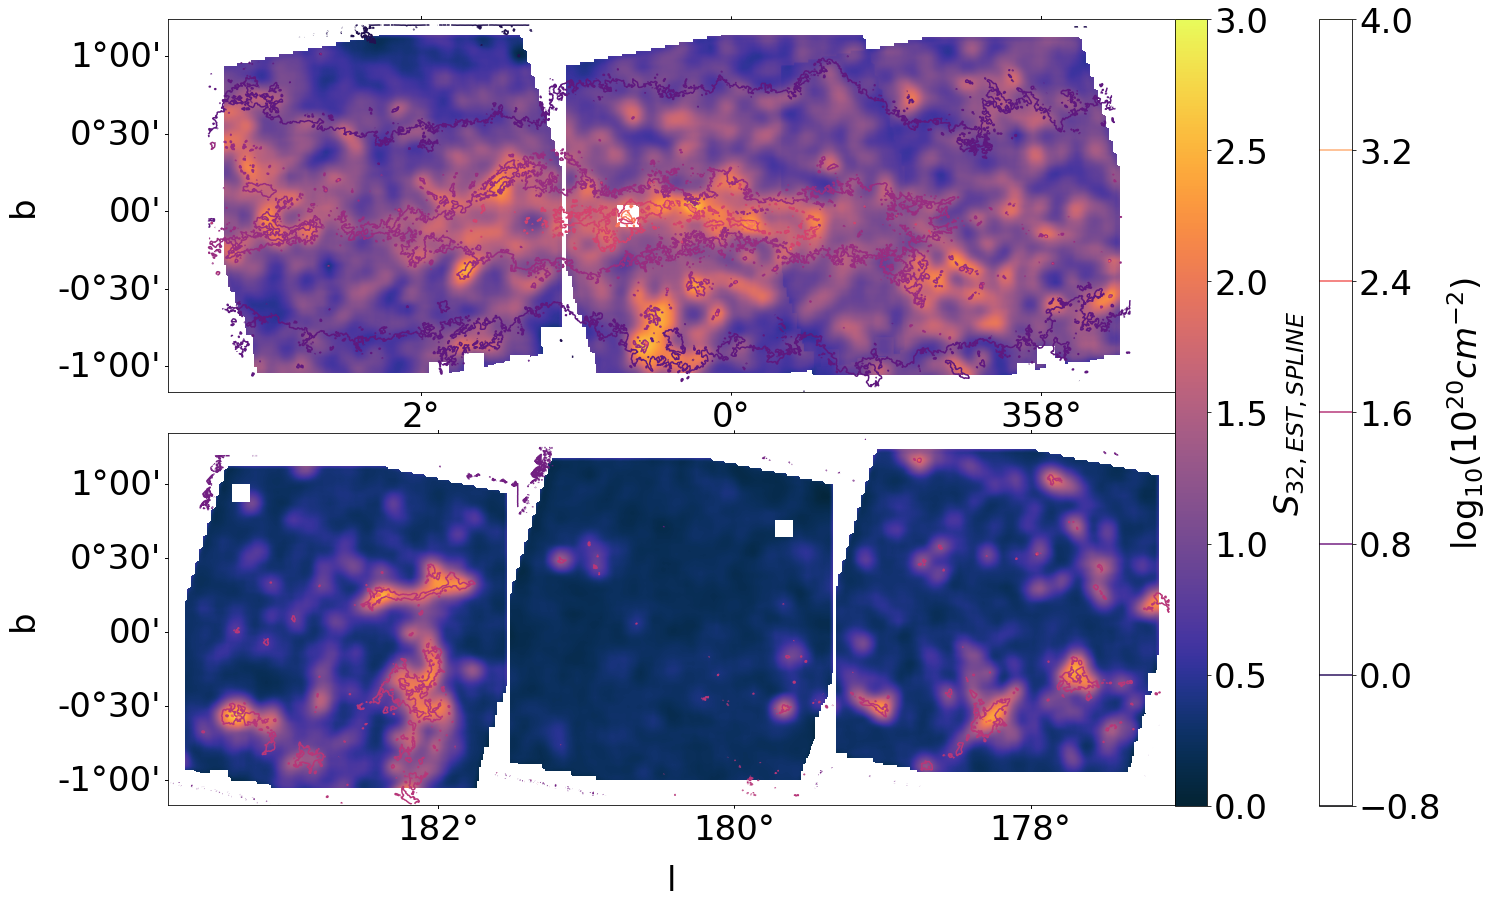

In [20]:
f = plt.figure(figsize=(10*1.5, 8*1.5))
plt.rcParams.update({'font.size': 34})

ax1 = plt.subplot(2,1, 1, projection=wcs_toward_S)
plt.imshow(array_toward_S, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel('b')
ax1.contour(np.log10(array_toward), levels = 5, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

plt.subplot(2,1, 2, projection=wcs_away_S)
im = plt.imshow(array_away_S, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=3)
plt.xlabel('l')
plt.ylabel('b')
cont = plt.contour(np.log10(array_away), levels = 5, cmap = 'magma')
ccax = plt.axes([1.1, 0.045, 0.03, 0.910])
plt.colorbar(cont, cax=ccax, label=r'$\log_{10}(10^{20} cm^{-2})$')


cax = plt.axes([0.966, 0.045, 0.03, 0.910])
plt.colorbar(im, cax=cax, label=r'$S_{32,EST,SPLINE}$')
plt.tight_layout()
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/S_32px_maps.png', bbox_inches="tight")

C:\Users\Matt\.conda\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


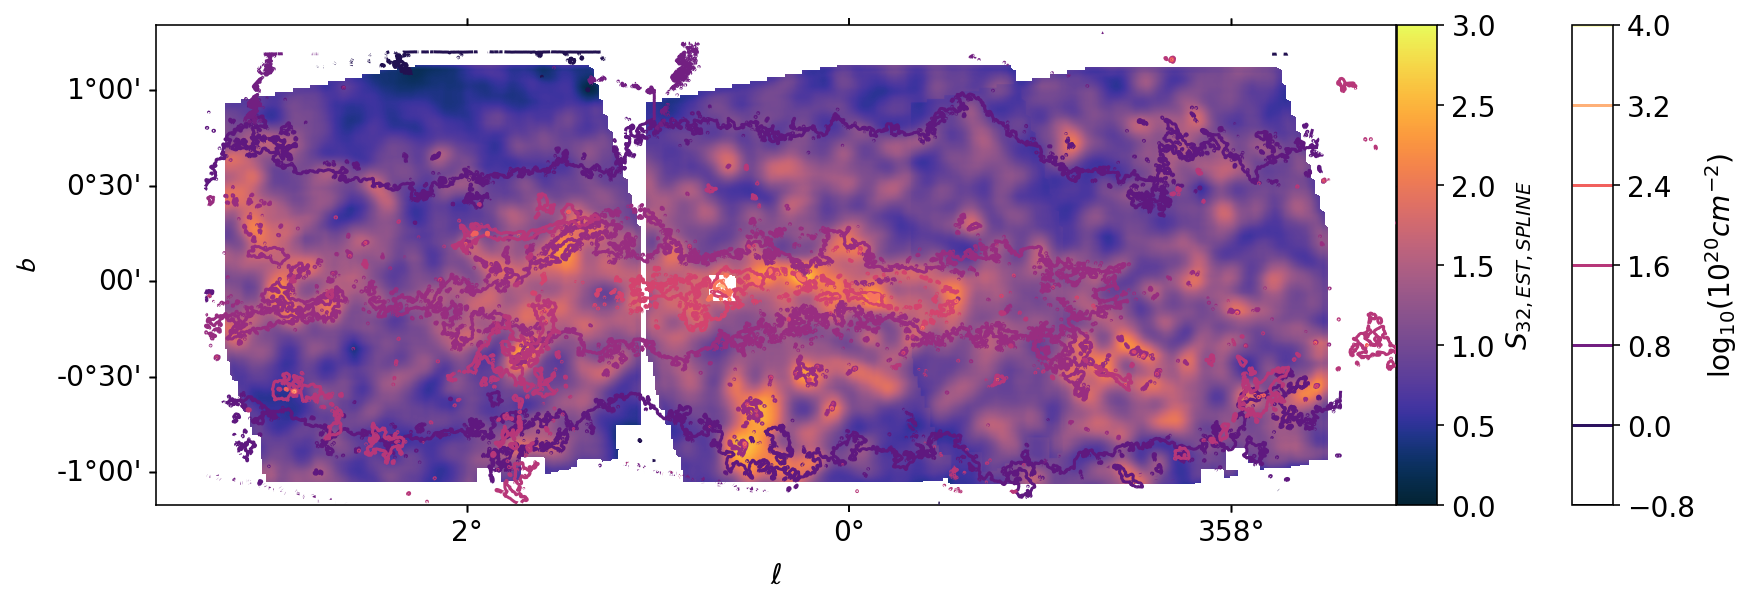

In [21]:
plt.figure(figsize=(1080*(10/8)/144, 1080/144/2), dpi=144)
plt.rcParams.update({'font.size': 14})

ax1 = plt.subplot(1,1, 1, projection=wcs_toward_S)
plt.imshow(array_toward_S, origin='lower', cmap=cmocean.cm.thermal, vmin=0, vmax=3)
ax1.set_xlabel(r'$\ell$')
ax1.set_ylabel(r'$\cal b$')
ax1.contour(np.log10(array_toward), levels = 5, cmap='magma')
offset = 150
left,right = ax1.get_xlim()
plt.xlim(left-offset, right+offset)

cont = plt.contour(np.log10(array_away), levels = 5, cmap = 'magma')
ccax = plt.axes([1.09, 0.055, 0.03, 0.890])
plt.colorbar(cont, cax=ccax, label=r'$\log_{10}(10^{20} cm^{-2})$')

cax = plt.axes([0.96, 0.055, 0.03, 0.890])
plt.colorbar(im, cax=cax, label=r'$S_{32,EST,SPLINE}$')
plt.tight_layout()
plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/S_32px_maps_toward.png', bbox_inches="tight")

In [4]:
PATH_64PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_fulltile/'
PATH_32PX = 'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_32px_fulltile/'
PATH = 'D:/Workshop/PhD/Data/ViaLactea/PPMAP_Results/'

In [ ]:
for folder in tqdm(os.listdir(PATH)):
    ######## Image, Lat, Lon ########
    direction = folder[1:4]
    hdu = fits.open(f'{PATH}{folder}/l{direction}_cdens.fits')[0]
    wcs = WCS(hdu.header)
    image_array = hdu.data
    shape = np.shape(image_array)
    x = np.arange(0, shape[0])
    y = np.arange(0, shape[1])
    xx, yy = np.meshgrid(x, y)
    coords_grid = pixel_to_skycoord(xx,yy, wcs)
    lat = coords_grid.l.degree
    lon = coords_grid.b.degree
    ######### 32PX H and S ########
    H_avg_array = np.loadtxt(f'{PATH_32PX}H/avg_data/{direction}.txt')
    H_avg_array[H_avg_array==0] = np.nan
    
    S_avg_array = np.loadtxt(f'{PATH_32PX}S/avg_data/{direction}.txt')
    S_avg_array[S_avg_array==0] = np.nan
    
    data_cube = np.array([image_array,H_avg_array,S_avg_array,lat,lon])
    
    pickle_out = open(f'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_32px_fulltile/DataCubes/l{direction}.pickle','wb')
    pickle.dump(data_cube,pickle_out)
    pickle_out.close()
    
    ######### 64PX H and S ########
    H_avg_array = np.loadtxt(f'{PATH_64PX}H/avg_data/{direction}.txt')
    H_avg_array[H_avg_array==0] = np.nan
    
    S_avg_array = np.loadtxt(f'{PATH_64PX}S/avg_data/{direction}.txt')
    S_avg_array[S_avg_array==0] = np.nan
    
    data_cube = np.array([image_array,H_avg_array,S_avg_array,lat,lon])
    
    pickle_out = open(f'D:/Workshop/PhD/Data/ViaLactea/CNN_Results/64px_fulltile/DataCubes/l{direction}.pickle','wb')
    pickle.dump(data_cube,pickle_out)
    pickle_out.close()

  1%|▌                                                                                 | 1/163 [00:15<43:03, 15.95s/it]

In [5]:
df = pd.DataFrame(columns = ['ColumnDensity','H_32px','H_64px','S_64px','S_32px', 'Lon','Lat'])
df

Empty DataFrame
Columns: [ColumnDensity, H_32px, H_64px, S_64px, S_32px, Lon, Lat]
Index: []

In [6]:
no_files = len(os.listdir(PATH_32PX+'DataCubes'))
no_files

163

In [7]:
for i in tqdm(range(no_files)):
    temp_df = pd.DataFrame()
    cube_64px = pickle.load(open(f'{PATH_64PX}/DataCubes/{os.listdir(PATH_64PX+"DataCubes")[i]}','rb'))
    cube_32px = pickle.load(open(f'{PATH_32PX}/DataCubes/{os.listdir(PATH_32PX+"DataCubes")[i]}','rb'))
    temp_df['ColumnDensity'] = cube_32px[0].flatten()
    temp_df['H_32px'] = cube_32px[1].flatten()
    temp_df['H_64px'] = cube_64px[1].flatten()
    temp_df['S_64px'] = cube_64px[2].flatten()
    temp_df['S_32px'] = cube_32px[2].flatten()
    temp_df['Lon'] = cube_32px[3].flatten()
    temp_df['Lat'] = cube_32px[4].flatten()
    temp_df = temp_df.dropna()
    df = df.append(temp_df)
    
df

100%|██████████████████████████████████████████████████████████████████████████████| 163/163 [1:55:17<00:00, 42.44s/it]


ColumnDensity    H_32px    H_64px    S_64px    S_32px         Lon  \
90901        43.848316  1.132676  1.013105  0.182611  0.932583    0.878091   
90902        44.163925  1.131395  1.007516  0.172928  0.909421    0.876424   
90903        44.504650  1.129157  1.001265  0.163932  0.889960    0.874758   
90904        44.041813  1.127536  0.994067  0.161262  0.872796    0.873091   
90905        42.832348  1.122884  0.987209  0.158186  0.857919    0.871425   
...                ...       ...       ...       ...       ...         ...   
1982652      22.551447  1.097621  0.968311  0.882883  0.946514  357.765677   
1982653      22.340574  1.101608  0.969171  0.890893  0.945772  357.764010   
1982654      22.440014  1.105811  0.970310  0.900034  0.945458  357.762343   
1982655      22.937342  1.109802  0.970702  0.906340  0.945615  357.760677   
1982656      23.580364  1.113994  0.971557  0.908361  0.945087  357.759010   

              Lat  
90901   -1.054206  
90902   -1.054207  
90903   -1.054207  
90904   -1.054208  
90905   -1.054208  
...           ...  
1982652  1.124606  
1982653  1.124606  
1982654  1.124605  
1982655  1.124605  
1982656  1.124604  

[270253084 rows x 7 columns]

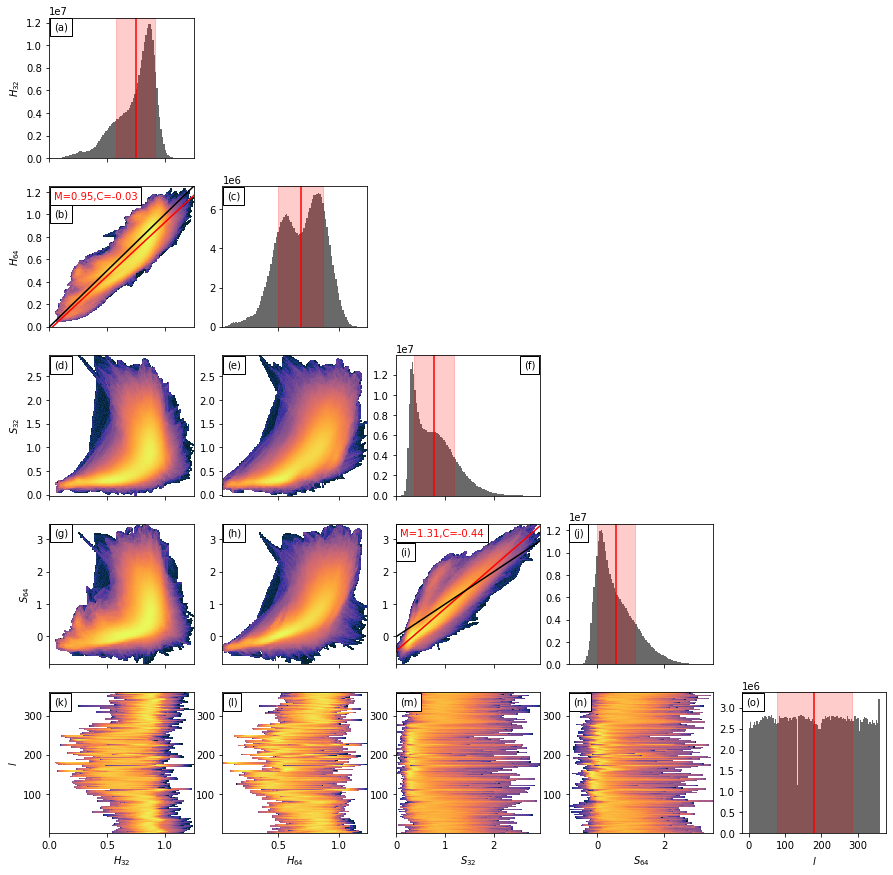

In [9]:
import matplotlib as mpl
plt.rcParams.update({'font.size': 10})
f,ax = plt.subplots(5,5, figsize=(15,15),sharex='col')

#hists

ax[0,0].hist(df['H_32px'], bins=100, facecolor='dimgrey')
ax[0,0].text(0.03, 0.91, '(a)', transform=ax[0,0].transAxes,bbox = dict(facecolor='white'))
ax[0,0].axvline(np.mean(df['H_32px']), color = 'r')
ax[0,0].axvspan(np.mean(df['H_32px'])-np.std(df['H_32px']),
               np.mean(df['H_32px'])+np.std(df['H_32px']), color = 'r', alpha=0.2)
ax[1,1].hist(df['H_64px'], bins=100, facecolor='dimgrey')
ax[1,1].text(0.03, 0.91, '(c)', transform=ax[1,1].transAxes,bbox = dict(facecolor='white'))
ax[1,1].axvline(np.mean(df['H_64px']), color = 'r')
ax[1,1].axvspan(np.mean(df['H_64px'])-np.std(df['H_64px']),
               np.mean(df['H_64px'])+np.std(df['H_64px']), color = 'r', alpha=0.2)
ax[2,2].hist(df['S_32px'], bins=100, facecolor='dimgrey')
ax[2,2].text(0.89, 0.91, '(f)', transform=ax[2,2].transAxes,bbox = dict(facecolor='white'))
ax[2,2].axvline(np.mean(df['S_32px']), color = 'r')
ax[2,2].axvspan(np.mean(df['S_32px'])-np.std(df['S_32px']),
               np.mean(df['S_32px'])+np.std(df['S_32px']), color = 'r', alpha=0.2)
ax[3,3].hist(df['S_64px'], bins=100, facecolor='dimgrey')
ax[3,3].text(0.03, 0.91, '(j)', transform=ax[3,3].transAxes,bbox = dict(facecolor='white'))
ax[3,3].axvline(np.mean(df['S_64px']), color = 'r')
ax[3,3].axvspan(np.mean(df['S_64px'])-np.std(df['S_64px']),
               np.mean(df['S_64px'])+np.std(df['S_64px']), color = 'r', alpha=0.2)
ax[4,4].hist(df['Lon'], bins=100, facecolor='dimgrey')
ax[4,4].text(0.03, 0.91, '(o)', transform=ax[4,4].transAxes,bbox = dict(facecolor='white'))
ax[4,4].axvline(np.mean(df['Lon']), color = 'r')
ax[4,4].axvspan(np.mean(df['Lon'])-np.std(df['Lon']),
               np.mean(df['Lon'])+np.std(df['Lon']), color = 'r', alpha=0.2)

##1

ax[1,0].hist2d(df['H_32px'],df['H_64px'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
z = np.polyfit(df['H_32px'], df['H_64px'], 1)
p = np.poly1d(z)
ax[1,0].plot([0,2], p([0,2]), c='r')
ax[1,0].text(0.03, 0.91, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[1,0].transAxes,c='r',bbox = dict(facecolor='white'))
ax[1,0].text(0.03, 0.78, '(b)', transform=ax[1,0].transAxes,bbox = dict(facecolor='white'))
ax[1,0].plot([0,2],[0,2],c='k')

##2

ax[2,0].hist2d(df['H_32px'],df['S_32px'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[2,0].text(0.03, 0.91, '(d)', transform=ax[2,0].transAxes,bbox = dict(facecolor='white'))

ax[2,1].hist2d(df['H_64px'],df['S_32px'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[2,1].text(0.03, 0.91, '(e)', transform=ax[2,1].transAxes,bbox = dict(facecolor='white'))

###3

ax[3,0].hist2d(df['H_32px'],df['S_64px'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[3,0].text(0.03, 0.91, '(g)', transform=ax[3,0].transAxes,bbox = dict(facecolor='white'))

ax[3,1].hist2d(df['H_64px'],df['S_64px'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[3,1].text(0.03, 0.91, '(h)', transform=ax[3,1].transAxes,bbox = dict(facecolor='white'))

ax[3,2].hist2d(df['S_32px'],df['S_64px'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
z = np.polyfit(df['S_32px'], df['S_64px'], 1)
p = np.poly1d(z)
ax[3,2].plot([0,3], p([0,3]), c='r')
ax[3,2].text(0.03, 0.91, f'M={z[0]:.2f},C={z[1]:.2f}',transform=ax[3,2].transAxes,c='r',bbox = dict(facecolor='white'))
ax[3,2].text(0.03, 0.78, '(i)', transform=ax[3,2].transAxes,bbox = dict(facecolor='white'))
ax[3,2].plot([0,3],[0,3],c='k')

##4

ax[4,0].hist2d(df['H_32px'],df['Lon'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[4,0].text(0.03, 0.91, '(k)', transform=ax[4,0].transAxes,bbox = dict(facecolor='white'))

ax[4,1].hist2d(df['H_64px'],df['Lon'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[4,1].text(0.03, 0.91, '(l)', transform=ax[4,1].transAxes,bbox = dict(facecolor='white'))
 
ax[4,2].hist2d(df['S_32px'],df['Lon'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[4,2].text(0.03, 0.91, '(m)', transform=ax[4,2].transAxes,bbox = dict(facecolor='white'))

ax[4,3].hist2d(df['S_64px'],df['Lon'],bins=200, cmap=cmocean.cm.thermal, norm=mpl.colors.LogNorm())
ax[4,3].text(0.03, 0.91, '(n)', transform=ax[4,3].transAxes,bbox = dict(facecolor='white'))

#labels

ax[0,0].set_ylabel(r'$H_{32}$')
ax[1,0].set_ylabel(r'$H_{64}$')
ax[2,0].set_ylabel(r'$S_{32}$')
ax[3,0].set_ylabel(r'$S_{64}$')
ax[4,0].set_ylabel(r'$\ell$')

ax[-1,0].set_xlabel(r'$H_{32}$')
ax[-1,1].set_xlabel(r'$H_{64}$')
ax[-1,2].set_xlabel(r'$S_{32}$')
ax[-1,3].set_xlabel(r'$S_{64}$')
ax[-1,4].set_xlabel(r'$\ell$')

ax[0,0].set_xlim([0,1.25])
ax[1,0].set_ylim([0,1.25])

ax[0,1].set_axis_off()
ax[0,2].set_axis_off()
ax[0,3].set_axis_off()
ax[0,4].set_axis_off()

ax[1,2].set_axis_off()
ax[1,3].set_axis_off()
ax[1,4].set_axis_off()

ax[2,3].set_axis_off()
ax[2,4].set_axis_off()

ax[3,4].set_axis_off()

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/64pxVS32pxReduced.png',bbox_inches="tight")
plt.show()

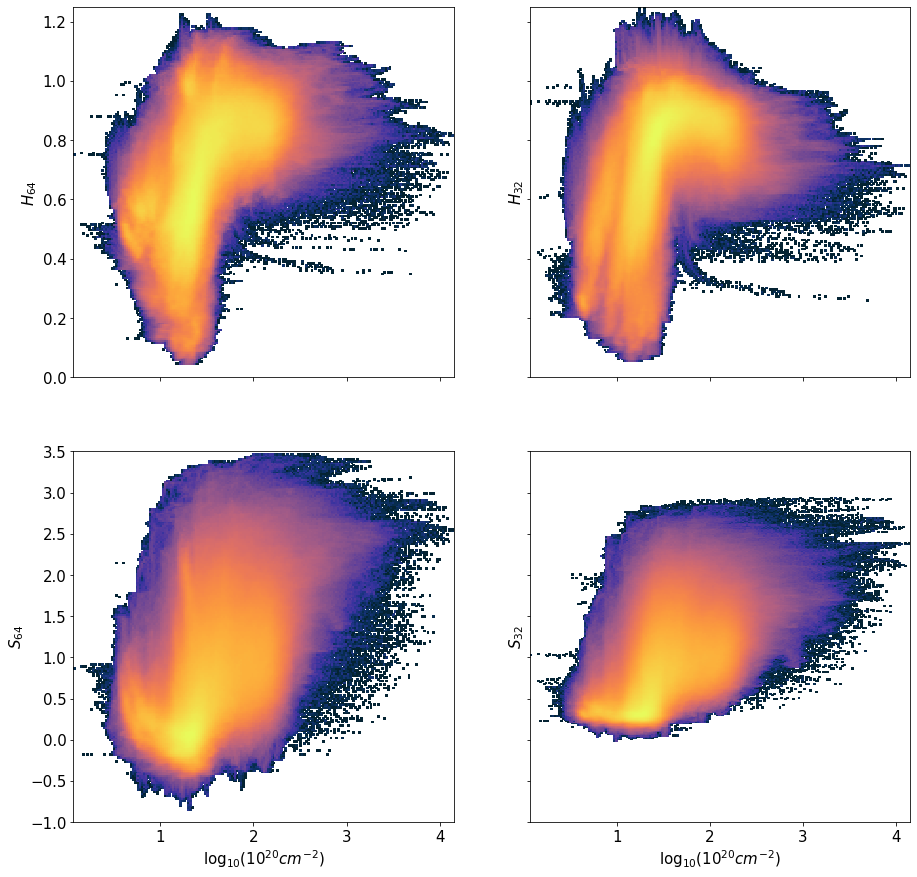

In [13]:
import matplotlib as mpl

plt.rcParams.update({'font.size': 15})
f,ax = plt.subplots(2,2, figsize=(15,15),sharex='col', sharey='row')

ax[0,0].hist2d(np.log10(df['ColumnDensity']),
               df['H_64px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[0,0].set_ylabel(r'$H_{64}$')

ax[0,1].hist2d(np.log10(df['ColumnDensity']),
               df['H_32px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[0,1].set_ylabel(r'$H_{32}$')

ax[1,0].hist2d(np.log10(df['ColumnDensity']),
               df['S_64px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[1,0].set_xlabel(r'$\log_{10}(10^{20}cm^{-2})$')
ax[1,0].set_ylabel(r'$S_{64}$')

ax[1,1].hist2d(np.log10(df['ColumnDensity']),
               df['S_32px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[1,1].set_xlabel(r'$\log_{10}(10^{20}cm^{-2})$')
ax[1,1].set_ylabel(r'$S_{32}$')

ax[1,1].set_ylim(-1,3.5)
ax[0,1].set_ylim(0,1.25)

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/ColDensComparision.png',bbox_inches="tight")
plt.show()

#### Central

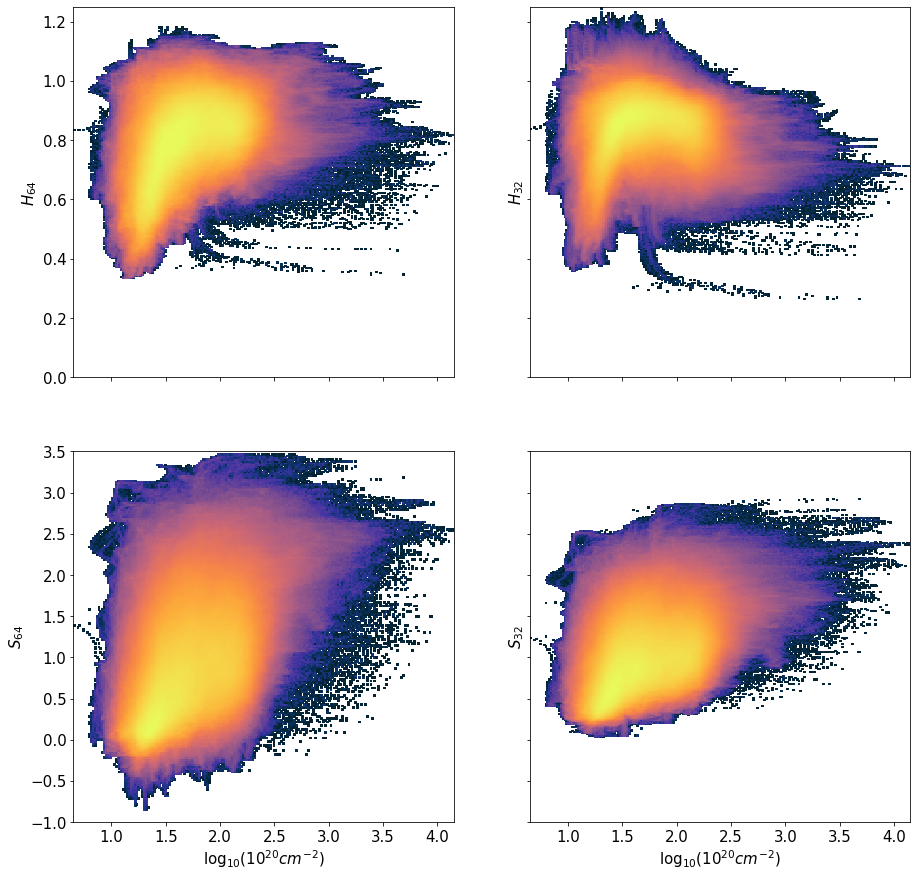

In [14]:
f,ax = plt.subplots(2,2, figsize=(15,15),sharex='col', sharey='row')

ax[0,0].hist2d(np.log10(df[(df['Lon']<90) | (df['Lon']>270)]['ColumnDensity']),
               df[(df['Lon']<90) | (df['Lon']>270)]['H_64px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[0,0].set_ylabel(r'$H_{64}$')

ax[0,1].hist2d(np.log10(df[(df['Lon']<90) | (df['Lon']>270)]['ColumnDensity']),
               df[(df['Lon']<90) | (df['Lon']>270)]['H_32px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[0,1].set_ylabel(r'$H_{32}$')

ax[1,0].hist2d(np.log10(df[(df['Lon']<90) | (df['Lon']>270)]['ColumnDensity']),
               df[(df['Lon']<90) | (df['Lon']>270)]['S_64px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[1,0].set_xlabel(r'$\log_{10}(10^{20}cm^{-2})$')
ax[1,0].set_ylabel(r'$S_{64}$')

ax[1,1].hist2d(np.log10(df[(df['Lon']<90) | (df['Lon']>270)]['ColumnDensity']),
               df[(df['Lon']<90) | (df['Lon']>270)]['S_32px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[1,1].set_xlabel(r'$\log_{10}(10^{20}cm^{-2})$')
ax[1,1].set_ylabel(r'$S_{32}$')

ax[1,1].set_ylim(-1,3.5)
ax[0,1].set_ylim(0,1.25)

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/ColDensComparisionToward.png',bbox_inches="tight")
plt.show()

#### Anti-Central

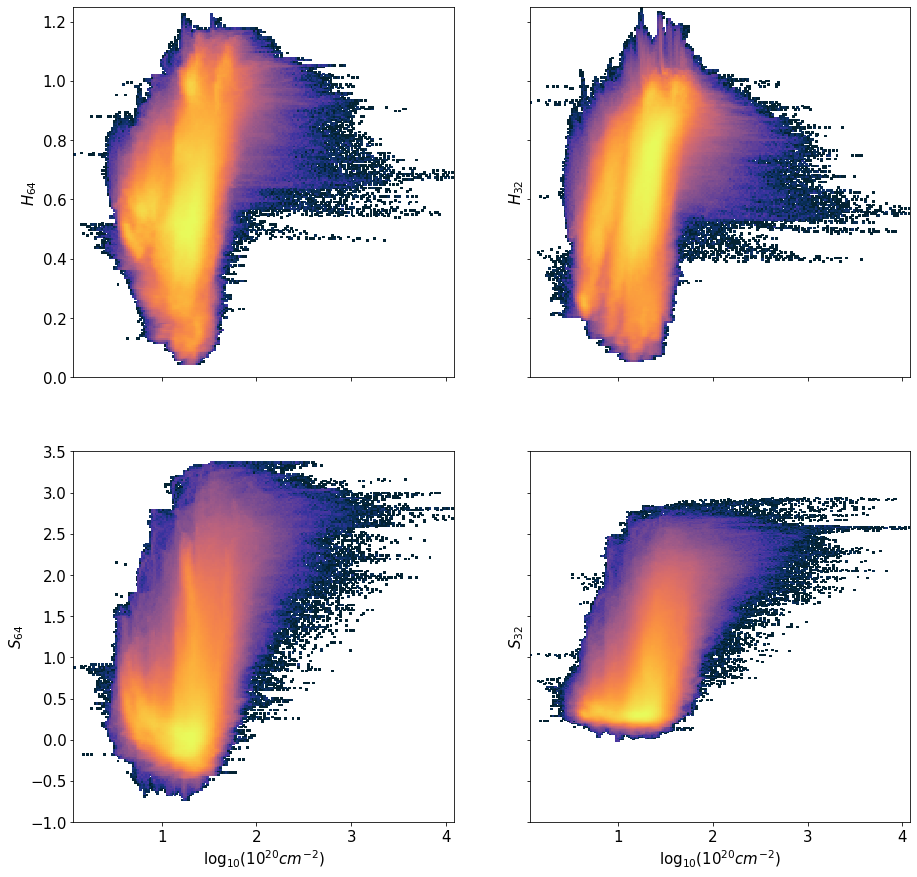

In [15]:
f,ax = plt.subplots(2,2, figsize=(15,15),sharex='col', sharey='row')

ax[0,0].hist2d(np.log10(df[(df['Lon']>90) & (df['Lon']<270)]['ColumnDensity']),
               df[(df['Lon']>90) & (df['Lon']<270)]['H_64px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[0,0].set_ylabel(r'$H_{64}$')

ax[0,1].hist2d(np.log10(df[(df['Lon']>90) & (df['Lon']<270)]['ColumnDensity']),
               df[(df['Lon']>90) & (df['Lon']<270)]['H_32px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[0,1].set_ylabel(r'$H_{32}$')

ax[1,0].hist2d(np.log10(df[(df['Lon']>90) & (df['Lon']<270)]['ColumnDensity']),
               df[(df['Lon']>90) & (df['Lon']<270)]['S_64px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[1,0].set_xlabel(r'$\log_{10}(10^{20}cm^{-2})$')
ax[1,0].set_ylabel(r'$S_{64}$')

ax[1,1].hist2d(np.log10(df[(df['Lon']>90) & (df['Lon']<270)]['ColumnDensity']),
               df[(df['Lon']>90) & (df['Lon']<270)]['S_32px'],
               bins=200, 
               cmap=cmocean.cm.thermal, 
               norm=mpl.colors.LogNorm())
ax[1,1].set_xlabel(r'$\log_{10}(10^{20}cm^{-2})$')
ax[1,1].set_ylabel(r'$S_{32}$')

ax[1,1].set_ylim(-1,3.5)
ax[0,1].set_ylim(0,1.25)

plt.savefig('D:\Workshop\PhD\Papers\HiGal paper\Images/ColDensComparisionAway.png',bbox_inches="tight")
plt.show()